
___
# Cluster Analysis
## K-means method
### Setting up for clustering analysis

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [15]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [16]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Building and running model

In [17]:
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

## Plotting model outputs

In [18]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

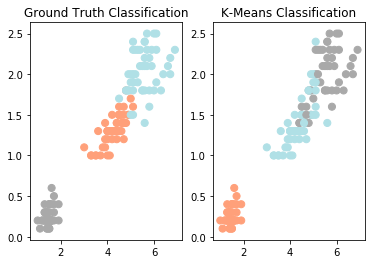

In [19]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

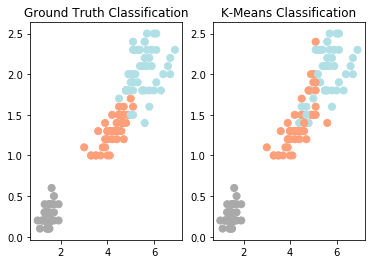

In [20]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

## Evaluate clustering results

In [21]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

   micro avg       0.83      0.83      0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



Text(0.5, 1.0, 'K-Means Classification')

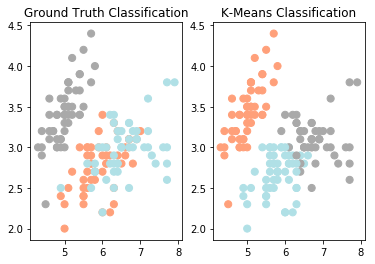

In [22]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Sepal_Length,y=iris_df.Sepal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Sepal_Length,y=iris_df.Sepal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

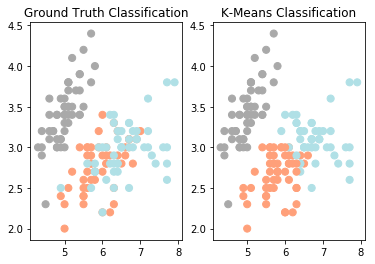

In [23]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Sepal_Length,y=iris_df.Sepal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Sepal_Length,y=iris_df.Sepal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

In [24]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

   micro avg       0.83      0.83      0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

